In [102]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [103]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [104]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [105]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [106]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [108]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

def bar(features):
    survived = train_data[train_data['Survived'] == 1][features].value_counts()
    dead = train_data[train_data['Survived'] == 0][features].value_counts()
    dff = pd.DataFrame([survived,dead])
    dff.index = ['Survived', 'Dead']
    dff.plot(kind='bar', stacked=True, figsize=(10,5))

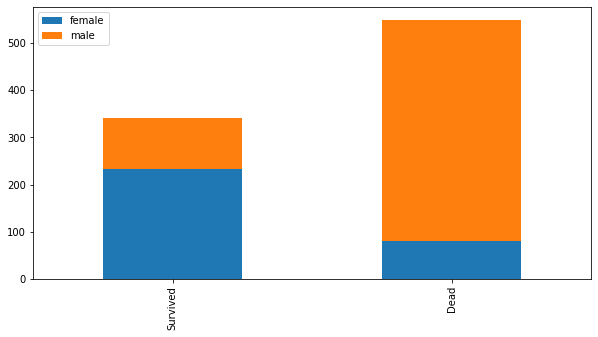

In [109]:
bar('Sex')

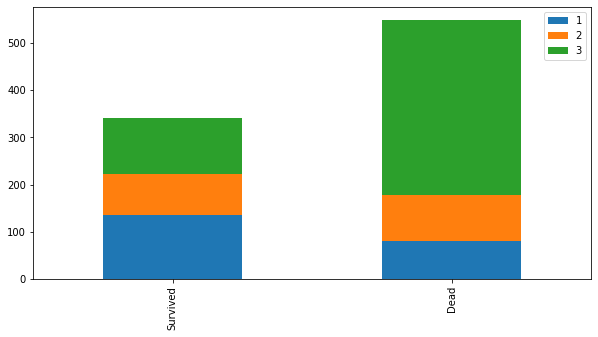

In [110]:
bar('Pclass')

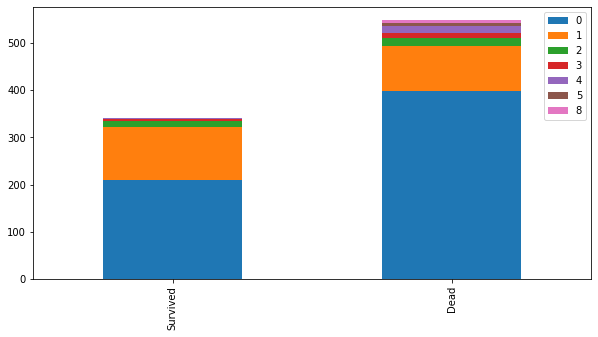

In [111]:
bar('SibSp')

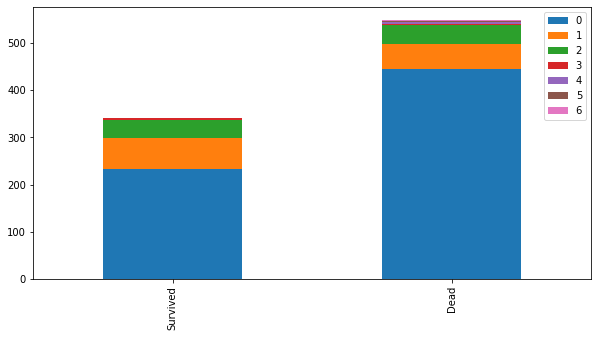

In [112]:
bar('Parch')

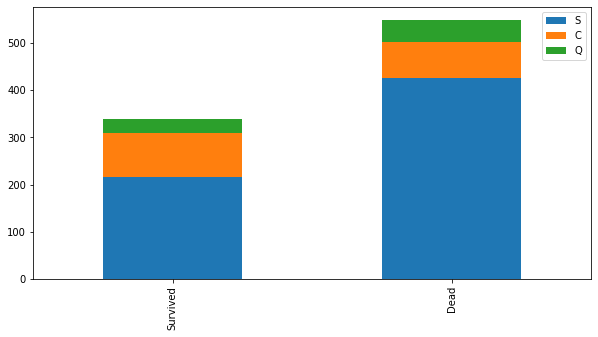

In [113]:
bar('Embarked')

In [114]:
#feature engeneering
combined_data = [train_data, test_data]
for dataset in combined_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [115]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Sir           1
Capt          1
Mme           1
Ms            1
Countess      1
Lady          1
Don           1
Name: Title, dtype: int64

In [116]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [117]:
title = {"Mr": 0, "Miss": 1, "Mrs": 2, 
         "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
         "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in combined_data:
    dataset['Title'] = dataset['Title'].map(title)

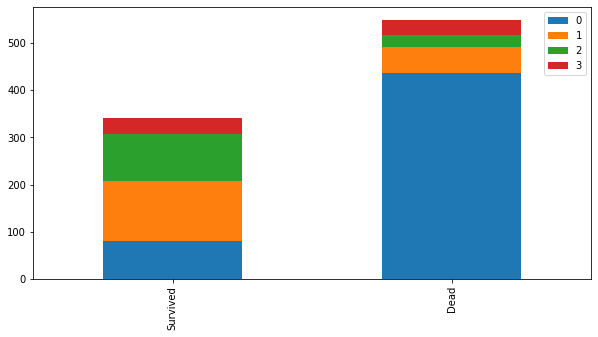

In [118]:
bar('Title')

In [119]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)


In [120]:
sex = {'male': 0, 'female': 1}

for dataset in combined_data:
    dataset['Sex'] = dataset['Sex'].map(sex)

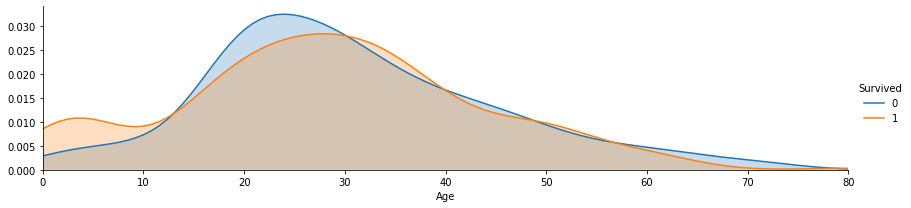

In [121]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

plt.show()

In [122]:
train_data['Age'].fillna(train_data.groupby('Title')['Age'].transform('median'), inplace=True)
test_data['Age'].fillna(test_data.groupby('Title')['Age'].transform('median'), inplace=True)

train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
E

In [123]:
for dataset in combined_data:
    dataset.loc[ dataset['Age'] <= 14, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 25), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 35), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 50), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 65), 'Age'] = 4,
    dataset.loc[(dataset['Age'] > 65), 'Age'] = 5
    

In [124]:
train_data.head(5)
test_data.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


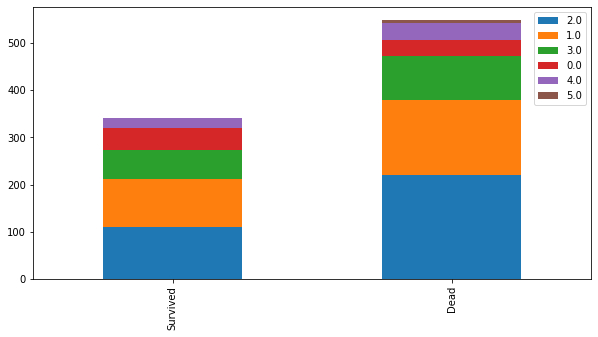

In [125]:
bar('Age')

In [126]:
for dataset in combined_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [127]:
embarked = {"S": 0, "C": 1, "Q": 2}
for dataset in combined_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [128]:
train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_data["Fare"].fillna(test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train_data.isnull().sum()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

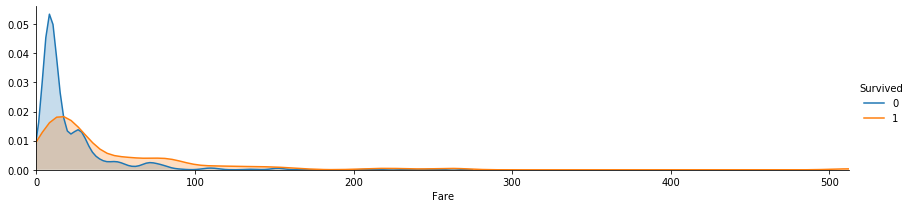

In [129]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
 
plt.show()

In [130]:
for dataset in combined_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [131]:
train_data.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
F33            3
              ..
B78            1
A7             1
A14            1
C62 C64        1
B73            1
Name: Cabin, Length: 147, dtype: int64

In [132]:
for dataset in combined_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

cabin = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}

for dataset in combined_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin)

In [133]:
train_data["Cabin"].fillna(train_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_data["Cabin"].fillna(test_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [134]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

In [135]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train_data = train_data.drop(features_drop, axis=1)
test_data = test_data.drop(features_drop, axis=1)
train_data = train_data.drop(['PassengerId'], axis=1)

In [136]:
train = train_data.drop('Survived', axis=1)
target = train_data['Survived']

In [137]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=8, shuffle=True, random_state=1)

In [139]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

for i in range (1, 20):
    model = RandomForestClassifier(n_estimators=i)
    score = cross_val_score(model, train, target, cv=k_fold, n_jobs=1, scoring='accuracy')
    print (round(np.mean(score)*100,2))


79.03
79.02
79.92
81.6
79.47
81.16
81.6
81.27
82.28
80.94
81.49
81.83
80.82
81.61
80.71
81.38
81.38
81.72
81.94


In [142]:
# Support vector classification
from sklearn.svm import SVC
model = SVC()
scoring = 'accuracy'
score = cross_val_score(model, train, target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(round(np.mean(score)*100,2))

C:\Users\1111\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\1111\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\1111\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\1111\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

82.39


C:\Users\1111\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\1111\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\1111\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [143]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5,max_features=2,max_depth=2, random_state=0)
scoring = 'accuracy'
score = cross_val_score(model, train, target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(round(np.mean(score)*100,2))

82.84


In [146]:
clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5,max_features=2,max_depth=2, random_state=0)
clf.fit(train, target)
test = test_data.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test)
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission7.csv', index=False)

In [147]:
pd.read_csv('submission7.csv').head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [205]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [206]:
y_train = train_data['Survived']
train_data.drop(labels='Survived', axis=1, inplace=True)

In [207]:
full_data = train_data.append(test_data)

In [208]:
full_data['Family_Size']=full_data['SibSp']+full_data['Parch']

In [209]:
full_data['Fare_Per_Person']=full_data['Fare']/(full_data['Family_Size']+1)

In [210]:
drop_columns = ['Name', 'SibSp', 'Embarked', 'Cabin','Parch', 'Ticket']
full_data.drop(labels = drop_columns, axis=1, inplace=True)

In [211]:
full_data = pd.get_dummies(full_data, columns=['Sex'])
full_data.fillna(value=0.0, inplace=True)

In [212]:
X_train = full_data.values[0:891]
X_test = full_data.values[891:]

In [213]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [220]:
state = 12
test_size = 0.25

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=state, shuffle=True)

In [221]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate,max_features=2,max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    print ('Learning rate:', learning_rate)
    print ('accuracy:', gb_clf.score(X_train, y_train))
    print ('accuracy (validation):', gb_clf.score(X_val, y_val)) 


Learning rate: 0.05
accuracy: 0.8100358422939068
accuracy (validation): 0.8617021276595744
Learning rate: 0.075
accuracy: 0.8100358422939068
accuracy (validation): 0.8617021276595744
Learning rate: 0.1
accuracy: 0.8172043010752689
accuracy (validation): 0.851063829787234
Learning rate: 0.25
accuracy: 0.8494623655913979
accuracy (validation): 0.7872340425531915
Learning rate: 0.5
accuracy: 0.8853046594982079
accuracy (validation): 0.7659574468085106
Learning rate: 0.75
accuracy: 0.9175627240143369
accuracy (validation): 0.7127659574468085
Learning rate: 1
accuracy: 0.931899641577061
accuracy (validation): 0.7659574468085106


In [199]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5,max_features=2,max_depth=2, random_state=0)

In [200]:
gb.fit(X_train, y_train)
print(gb.score(X_val, y_val))
predictions = gb.predict(X_test)

0.7937219730941704


In [159]:
output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived': prediction})
output.to_csv('titanic4.csv', index=False)

In [176]:
output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived': prediction})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [154]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=100, random_state=None)

In [155]:
print(model.score(X_val, y_val))

0.8202247191011236


In [156]:
predictions = model.predict(X_test)